In [63]:
import random
import matplotlib.pyplot as plt

# Définition des paramètres de base de la simulation
population_size = 1000
initial_innovators = 100
itération = 10

class Person:
    # Initialisation de chaque personne avec un âge et une sensibilité à la publicité
    def __init__(self, age, strength_pub):
        self.age = age
        self.prob_adoption = strength_pub * 0.7  # Réduction de l'impact de la publicité
        self.innovation_status = 0  # Statut d'adoption (0 = non adopté, 1 = adopté)
        self.prob_decline = 0.1  # Probabilité initiale de rejet

def normalize_probability(prob):
    # Normalisation des probabilités pour qu'elles restent entre 0 et 1
    return max(min(prob, 1), 0)

def influence_people(person, population, strength_pub, influence_weight=0.01, decline_weight=0.02):
    # Calcul des influences des pairs sur une personne donnée pour l'adoption ou le rejet
    influence_sum = 0
    decline_sum = 0
    count = 0
    for other in population:
        if person != other:
            gap_age = abs(person.age - other.age)
            influence = influence_weight / (1 + gap_age) * (2 * other.innovation_status - 1)
            influence_sum += influence
            decline = decline_weight / (1 + gap_age) * (1 - 2 * other.innovation_status)
            decline_sum += decline
            count += 1
    influence_average = influence_sum / count if count else 0
    decline_average = decline_sum / count if count else 0
    new_prob_adoption = (strength_pub * 0.8) + influence_average
    new_prob_decline = person.prob_decline + decline_average
    return normalize_probability(new_prob_adoption), normalize_probability(new_prob_decline)

def decide_adoption(person, population, strength_pub):
    # Décision d'adoption ou de rejet basée sur les probabilités calculées
    new_prob_adoption, new_prob_decline = influence_people(person, population, strength_pub)
    if person.innovation_status == 0:
        if random.random() < new_prob_adoption:
            person.innovation_status = 1
    else:
        if random.random() < new_prob_decline:
            person.innovation_status = 0

def generate_population(population_size, initial_innovators, strength_pub):
    # Génération de la population initiale avec un nombre donné d'innovateurs
    population = [Person(random.randint(15, 75), strength_pub) for _ in range(population_size)]
    innovators = random.sample(population, initial_innovators)
    for innovator in innovators:
        innovator.innovation_status = 1
    return population

def run_simulation(population, iterations):
    # Exécution de la simulation sur un nombre défini d'itérations
    adoption_history = []
    for _ in range(iterations):
        for person in population:
            decide_adoption(person, population, person.prob_adoption)
        adoption_count = sum(p.innovation_status for p in population)
        adoption_history.append(adoption_count)
    return adoption_history

def plot_adoption_history(adoption_history, title, population_size, initial_innovators, strength_pub, iterations):
    plt.figure(figsize=(10, 5))
    plt.plot(adoption_history, marker='o')
    plt.title(f"{title} - Publicité: {strength_pub}, Population: {population_size}, Innovateurs: {initial_innovators}, Itérations: {iterations}")
    plt.xlabel('Itérations')
    plt.ylabel('Nombre d\'adopteurs')
    plt.grid(True)
    plt.show()

def plot_adoption_by_age(population, title, population_size, initial_innovators, strength_pub, iterations):
    ages = [person.age for person in population if person.innovation_status == 1]
    plt.figure(figsize=(10, 5))
    plt.hist(ages, bins=range(15, 76, 5), alpha=0.75, color='blue', edgecolor='black')
    plt.title(f"{title} - Publicité: {strength_pub}, Population: {population_size}, Innovateurs: {initial_innovators}, Itérations: {iterations}")
    plt.xlabel('Âge')
    plt.ylabel('Nombre d\'adopteurs')
    plt.grid(True)
    plt.show()


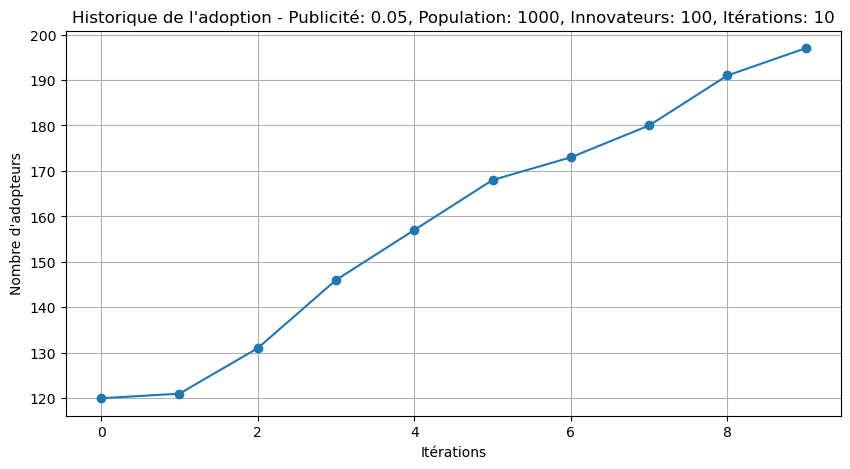

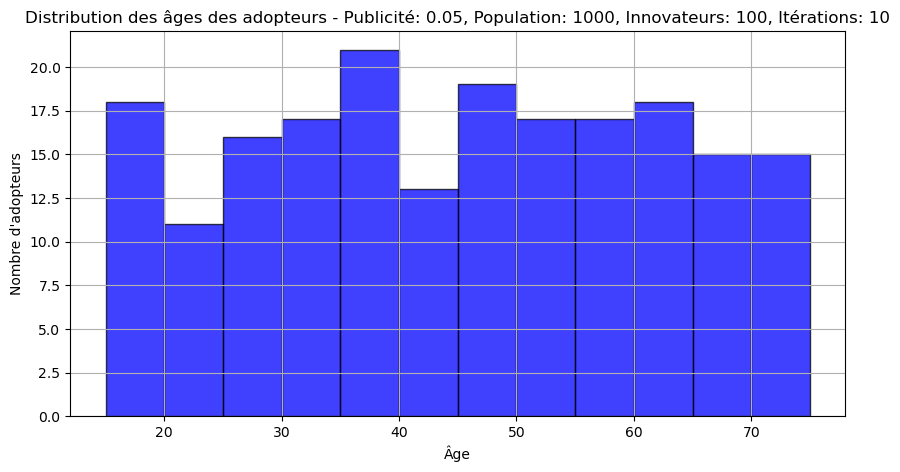

In [64]:
# Paramètres de la simulation
strength_pub = 0.05  # Force de l'influence de la publicité
population_size = 1000  # Taille de la population
initial_innovators = 100  # Nombre initial d'innovateurs
iterations = 10  # Nombre d'itérations de la simulation

# Génération de la population initiale
population = generate_population(population_size, initial_innovators, strength_pub)

# Exécution de la simulation
adoption_history = run_simulation(population, iterations)

# Affichage de l'historique de l'adoption
plot_adoption_history(adoption_history, "Historique de l'adoption", population_size, initial_innovators, strength_pub, iterations)

# Affichage de la distribution des âges des adopteurs
plot_adoption_by_age(population, "Distribution des âges des adopteurs", population_size, initial_innovators, strength_pub, iterations)


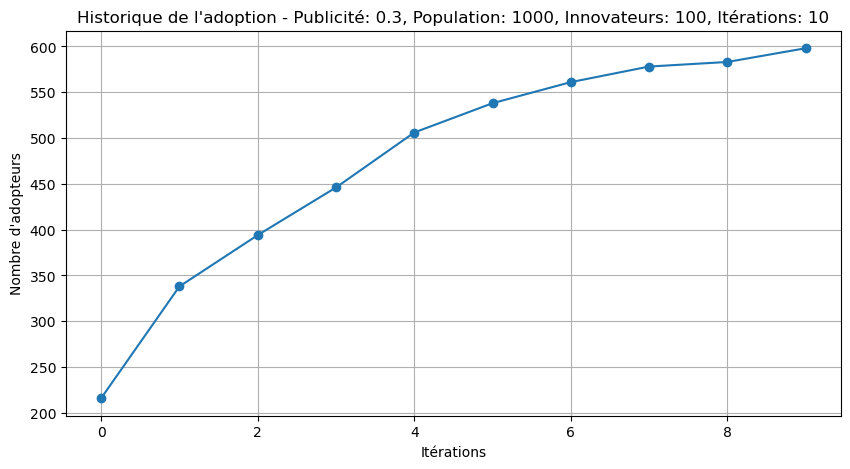

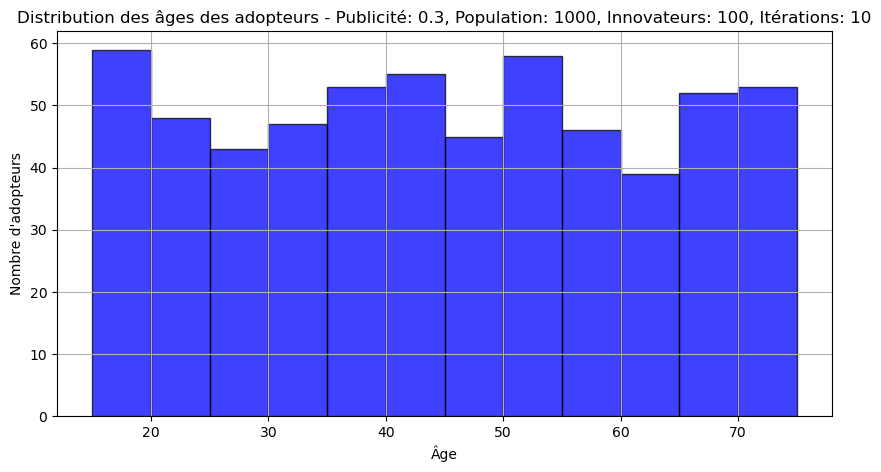

In [65]:
strength_pub = 0.3  
population_size = 1000  
initial_innovators = 100  
iterations = 10  

population = generate_population(population_size, initial_innovators, strength_pub)

adoption_history = run_simulation(population, iterations)

plot_adoption_history(adoption_history, "Historique de l'adoption", population_size, initial_innovators, strength_pub, iterations)

plot_adoption_by_age(population, "Distribution des âges des adopteurs", population_size, initial_innovators, strength_pub, iterations)

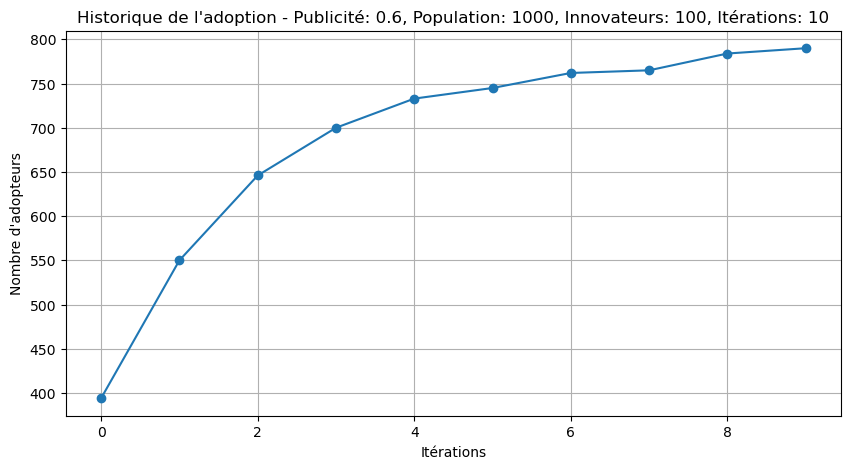

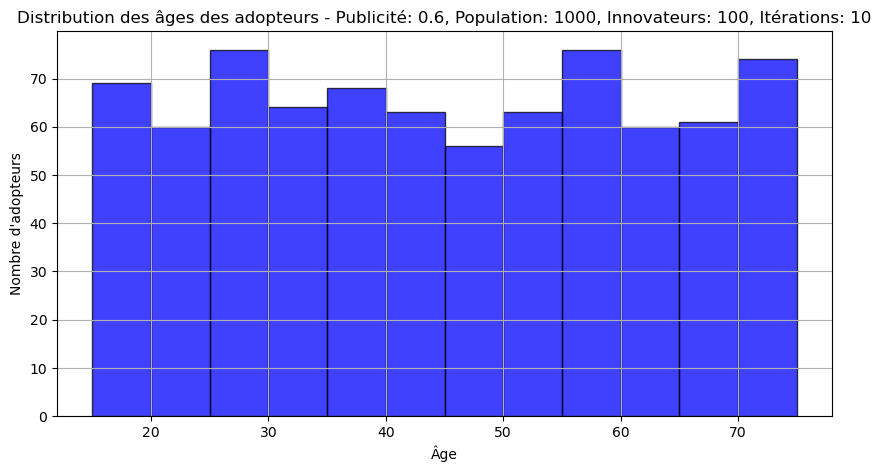

In [66]:
strength_pub = 0.6  
population_size = 1000  
initial_innovators = 100  
iterations = 10  

population = generate_population(population_size, initial_innovators, strength_pub)

adoption_history = run_simulation(population, iterations)

plot_adoption_history(adoption_history, "Historique de l'adoption", population_size, initial_innovators, strength_pub, iterations)

plot_adoption_by_age(population, "Distribution des âges des adopteurs", population_size, initial_innovators, strength_pub, iterations)

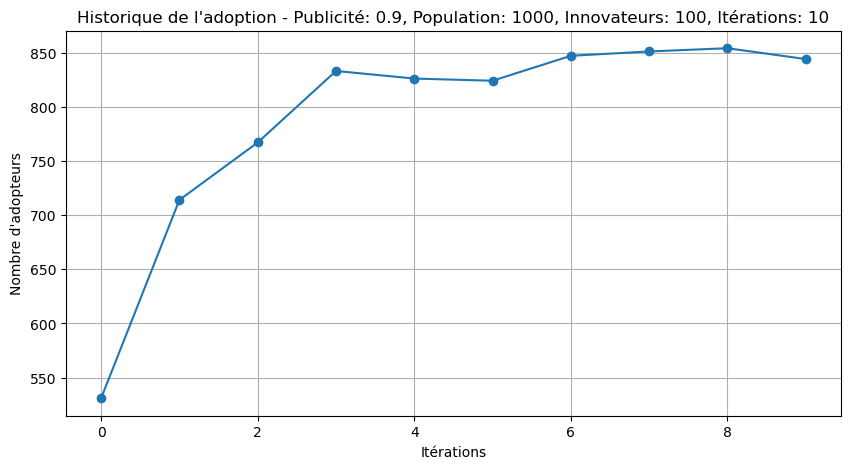

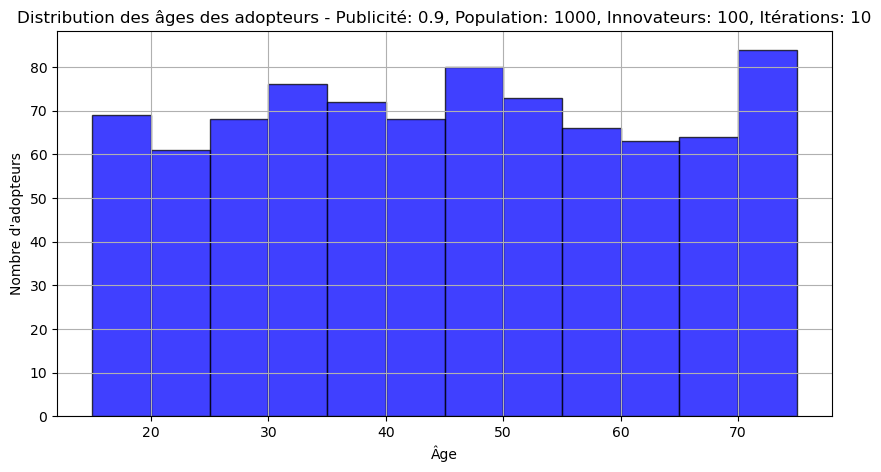

In [67]:
strength_pub = 0.9  
population_size = 1000  
initial_innovators = 100  
iterations = 10  

population = generate_population(population_size, initial_innovators, strength_pub)

adoption_history = run_simulation(population, iterations)

plot_adoption_history(adoption_history, "Historique de l'adoption", population_size, initial_innovators, strength_pub, iterations)

plot_adoption_by_age(population, "Distribution des âges des adopteurs", population_size, initial_innovators, strength_pub, iterations)

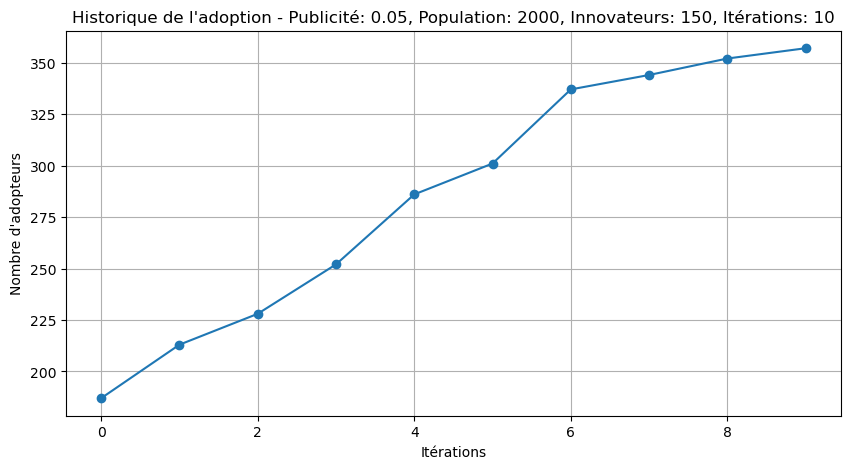

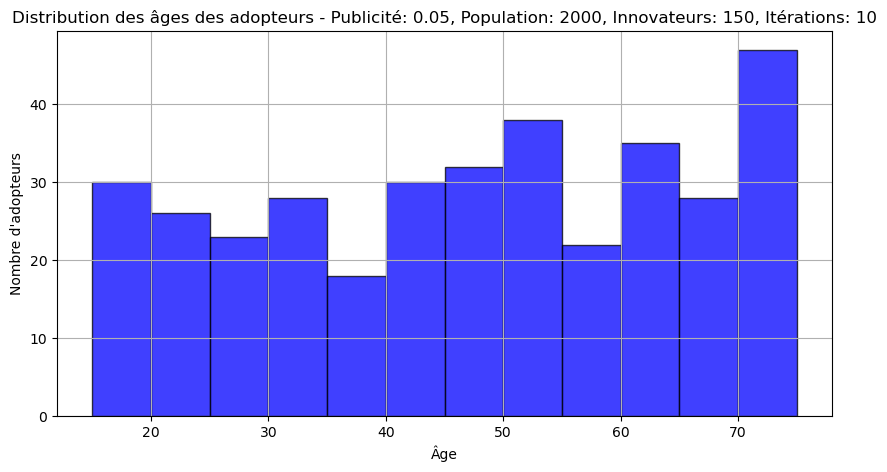

In [68]:
strength_pub = 0.05  
population_size = 2000  
initial_innovators = 150  
iterations = 10  

population = generate_population(population_size, initial_innovators, strength_pub)

adoption_history = run_simulation(population, iterations)

plot_adoption_history(adoption_history, "Historique de l'adoption", population_size, initial_innovators, strength_pub, iterations)

plot_adoption_by_age(population, "Distribution des âges des adopteurs", population_size, initial_innovators, strength_pub, iterations)

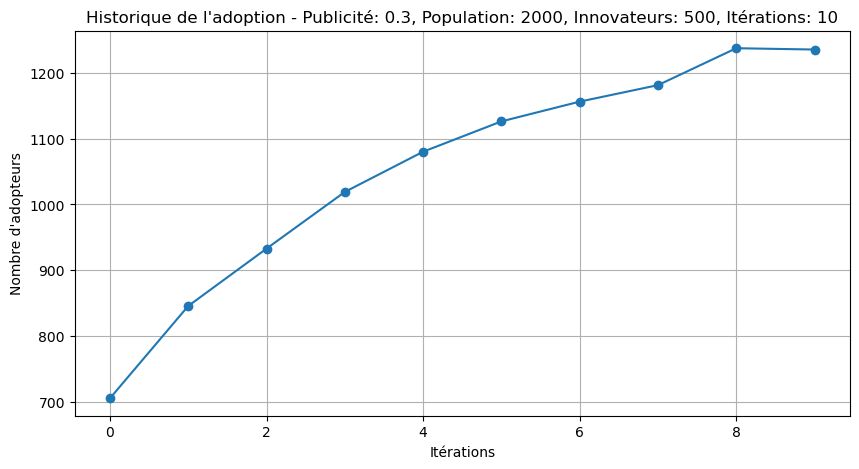

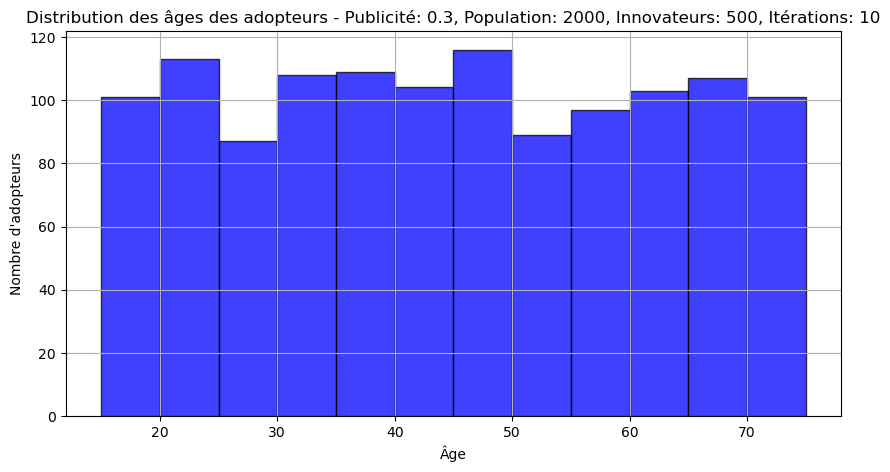

In [69]:
strength_pub = 0.3  
population_size = 2000  
initial_innovators = 500  
iterations = 10  

population = generate_population(population_size, initial_innovators, strength_pub)

adoption_history = run_simulation(population, iterations)

plot_adoption_history(adoption_history, "Historique de l'adoption", population_size, initial_innovators, strength_pub, iterations)

plot_adoption_by_age(population, "Distribution des âges des adopteurs", population_size, initial_innovators, strength_pub, iterations)